In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [3]:
f(3.0)

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


20.0

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


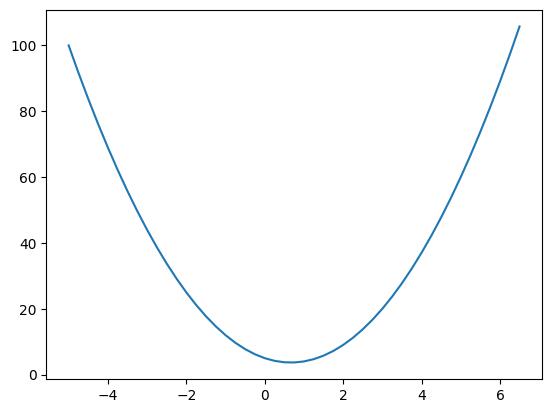

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [4]:
xs = np.arange(-5,6.75, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
h = 0.0001
x = 2/3
(f(x + h) - f(x))/h

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


0.0002999999981767587

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [6]:
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print("d1",d1)
print("d2",d2)
slope = (d2-d1)/h
print("slope = ", slope)

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
d1 4.0
d2 3.999699999999999
slope =  -3.000000000010772
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [7]:
class Value:
    def __init__(self, data, _children=(), _op='', label = ""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), _op="+")
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), _op="*")
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2 * self.data) - 1) / (math.exp(2 * self.data) + 1)
        out = Value(t, (self, ), 'tanh')
        return out

a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10, label="c")
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label="f")
L = d * f; L.label = "L"
print(L)

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
Value(data=-8.0)
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


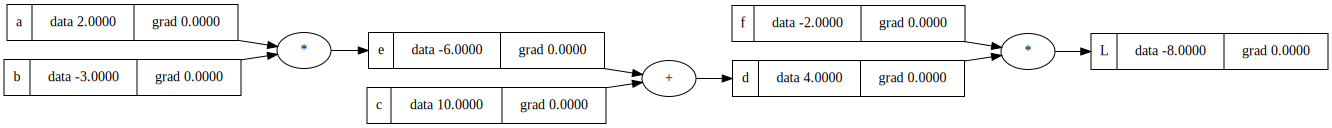

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [8]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape="record")

        if n._op:
            dot.node(name = uid + n._op, label= n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

draw_dot(L)

In [9]:
def gradient_check():
    h = 0.001

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10, label="c")
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label="f")
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10, label="c")
    b.data += h
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label="f")
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)

gradient_check()

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
-3.9999999999995595
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


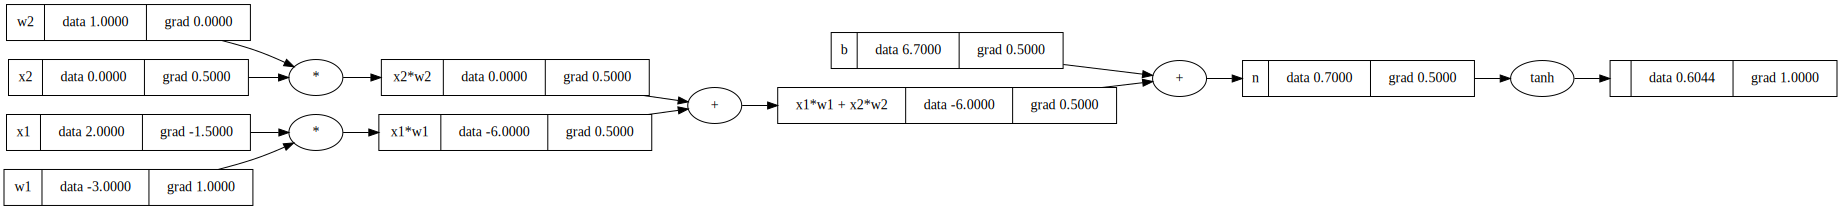

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [10]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.7, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh()
o.grad = 1.0

n.grad = 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x2w2.grad = 0.5
x1w1.grad = 0.5
w2.grad = x2.data * x2w2.grad
x2.grad = w2.data * x2w2.grad
w1.grad = x1.data * x1w1.grad
x1.grad = w1.data * x1w1.grad


draw_dot(o)
